# Lab 9. Reinforcement learning

Recall that reinforcement learning relies on the interaction of the learning algorithm (which we call agent in this framework) and its environment by means of the actions the learner takes, which impact the environment and the rewards he received in return for his actions.   

<img src="reinforcementImage.png",width=300,height=300>

Image source: [Reinforcement Learning Coach](https://nervanasystems.github.io/coach/)

### Part I : Greedy approach and $\varepsilon$-Greedy approaches

#### Exercise I.1. Stationnary approach

We will start by considering a simple k-armed bandit problem such as the one discussed in class. Here we take $k = 4$ and we take the reward to follow a Gaussian distribution with mean $mu_i$ and $\sigma = 1$. 

In [ ]:
mu1 = 0 # put your choice for the value 
# (the mean of the distribution). We assume the distribution of the 
mu2 = 0
mu3 = 0
mu4 = 0

sigma1 = 1
sigma2 = 1
sigma3 = 1
sigma4 = 1




maxIter = 100
iter = 0

while iter < maxIter:
    
    
    action = 0 # sample an action at random from 0 to 3
    
    reward = 0 # sample the reward according to the Gaussian distribution
    
    value  = 0 # update the value 
    
    
    iter +=1
    

#### Exercise I.2. Non stationnary version

Now code the non stationnary version of the k-bandit algorithm

In [ ]:
mu1 = 0 # put your choice for the value 
# (the mean of the distribution). We assume the distribution of the 
mu2 = 0
mu3 = 0
mu4 = 0

sigma1 = 1
sigma2 = 1
sigma3 = 1
sigma4 = 1




maxIter = 100
iter = 0

while iter < maxIter:
    
    
    action = 0 # sample an action at random from 0 to 3
    
    reward = 0 # sample the reward according to the Gaussian distribution
    
    value  = 0 # update the value 
    
    
    iter +=1
    

### Part II : Introduction to Q-Learning.


There are several libraries in python including RLLib, pybrain,... that can be used to code reinforcement learning approaches. When Starting, a good approach is to consider the [Gym toolkit](https://gym.openai.com/) from openAI. Gym is compatible with both Theano and TensorFlow and contains a collection of examples that can be used to illustrate most of the reinforcement learning frameworks. Install gym with "pip install gym" (you may need !pip install cmake 'gym[atari]') or use 

"git clone https://github.com/openai/gym"

"cd gym"

"pip install -e ."

if you prefer to clone the git repository. 


#### Exercise II.1. Gym Self Driving cab
(based on the [learndatasci](https://www.learndatasci.com/) tutorials)

As a starting point, we will consider the [self driving cab](https://gym.openai.com/envs/Taxi-v2/) example. Use the lines below to display the map for this particular example. The objective in this exercise is to train the cab through RL in order to (1) Drop off the passenger at the right location (2) save as much time as possible by taking the shortest path from the pick up to the drop off location and (3) respect traffic rules. 

- The cab is represented by the yellow rectangle. It is free to move on a 5x 5 grid and its spatial state can thus be described by a dimension 25 vector. 

- Wherever it is, the cab has four possible destinations, the four positions 'R', 'Y' 'G' and 'B'.  

- We will further assume that the passengers can be picked up in any of the four locations R, G, Y and B. On top of those four locations, we also need to account for the framework in which the passenger is inside the cab. Any passenger position can thus be encoded by 5 binary variables.


In this case, the state of the environment can thus be encoded by $5\times 5 \times 4 \times 5$ binary variables. 


- Finally we need to encode the possible actions that the cab can take. At each location the cab can move in each of the four directions - east, west, north, south but it can also pick up or dropoff a passenger. We can thus encode the actions of the cab through 6 binary variables. 




In [1]:
import gym

env = gym.make("Taxi-v2").env

env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



__The cab is not supposed to cross the vertical bars which are representing wall and we will thus enforce this by setting the reward associated to impossible moves to -1__

Gym lets us access the environement by means of the variable 'env'. The variable comes up with 3 methods. 

- env.reset
- env.step (apply a step)
- env.render (display the current state of the environment)

You can also use env.action_space as well as env.observation_space to respectively access the set of actions and existing states of the environment. 

Use the first and third methods to reset and display the original state of your environment after resetting it.

In [ ]:
# your code 



The point of this first exercise is for the agent to learn a mapping from the existing states to the optimal actions.

__Step I. Interacting with and displaying the environment.__ 

Each state o fthe environment can either be encoded as a single number (between 0 and 499) or as a (5,5,5,4) tuple of the form (cab row, cab col, passenger index, direction). To move between the two, gym provides teh method 'encode' of the variable 'env'. Using the lines below, together with the render method discussed above, set and display a couple of environment states


In [ ]:
state = env.encode(0,0,0,0) # change the 4 tuple to the state you wan to encode 
env.s = state

env.render()

__Step II. Taking actions based on rewards__ 

To each state of the environment is associated a Reward table which can be accessed through the line env.P[n] where n is the number encoding a particular state of the environment. Look at the reward tables of the states you rendered above. 

In [ ]:
# your code (one line)

The reward table has 5 rows (encoding the actions) and four columns of the form (probability, nextstate, reward, done). In this framework we don't consider any probability so this variable is always set to $1$. The last column indicates when the cab has droped a passenger at the right location. 

Each successful dropoff concludes one episode. 


#### Exercise II.1. 

Implement a full episode. That is we want an infinite loop that stops when the passenger has been droped. 

(hint: to sample an action you can use the method 'env.action_space.sample()'. Then note that env.step returns a four tuple of the form (state, reward, done, info) where 'done' indicates whether the passenger has been droped.)

In [ ]:
'''This script should run one episode in which the cab takes random actions 
until the passenger is droped at the right location'''

while not done: # change the condition for the loop to stop when the state 
    
    
    # put your code here
    
    
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

Once you have stored all the frames, use the lines below to play the resulting movie.

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

#### Exercise II.2. 

We will now see how one can exploit the previous experience of our agent to increase the rewards over time through Q-learning. In Q-learning the idea is to keep track of the actions that were beneficial by updating a mapping from any pair (environment state, action) to some number encoding the value of the pair. Q-values are updated following the equation 

\begin{align}
Q(\text{state}, \text{action}) &\leftarrow (1-\alpha) Q(\text{state}, \text{action}) \\
&+ \alpha (\text{reward} + \gamma \max_a Q(\text{next state}, \text{all actions}))\end{align}


That is we not only try to maximize the immediate reward but we also try to look for the action that will lead to the highest potential reward one step ahead. In the equation above, $\alpha$ can be interpreted as a __learning rate__. $\gamma$ which is known as the __discount factor__ indicates how much importance we want to give to the future rewards.  

The __Q-table__ is a table with 500 rows corresponding to the 500 states and 6 columns encoding each of the 6 actions. We will use a numpy array of zero to encode this table. Finally in order for our learning algorithm to be efficient, we will alternate between exploitation (with probability epsilon) and exploitation with probability (1-epsilon). 


Extend the "random cab" episode from Exercise II.1. in order to account for the Q table. 

- Use the line 'next_state, reward, done, info = env.step(action)'  to update the environment 
- Select the action either at random or according to the Q-table

(Hint: to decide between exploration and exploitation, split the $[0,1]$ interval between a $[0,\varepsilon]$ subinterval and a $[\varepsilon,1]$ subinterval. Then draw a number uniformly at random from the $[0,1]$ interval. If the number falls in $[0,\varepsilon]$ interval then pick an action at random. Otherwise,  )

In [ ]:
'''This script should code one episode in which a random action is 
taken with probability epsilon and the action maximizing Q is taken with probability (1-epsilon)'''


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        

        # complete the episode here
        
        
        
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")



#### Exercise II.3. Evaluating the agent 

Once you have learned the Q-table, evaluate the agent behavior by choosing at each the step and in each state, the action that maximizes the value of the Q-table and play the resulting movie using the 

In [ ]:
# your code

### Part III Combining Neural networks with reinforcement learning: The CartPole

We have seen how to use reinforcement learning on simple examples. A powerful aspect of reinforcement learning though is that it can be combined with neural networks. In this second exercise, we will see how to combine the neural network architectures from Keras with the reinforcement learning environment provided by gym. Start by installing the libraries h5py and keras-rl

pip install h5py

pip install gym

pip install keras-rl


We will focus on a simple CartPole problem (see [1](https://gym.openai.com/envs/CartPole-v0/)). In this simple problem, a pole is attached to a cart which is able to move back and forth on a frictionless track. The task is to balance the pole around its unstable equilibrium, using only horizontal forces on the cart (see [2](http://underactuated.csail.mit.edu/underactuated.html?chapter=acrobot)). The goal is to control the car by applying either a +1 or a -1 force on it. 



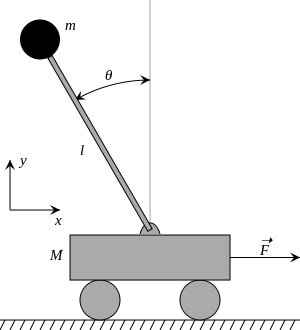

In [2]:
from IPython.display import Image
Image("cartpole1.png", width=200, height=100)

In [ ]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

#### III.0 Deep Q learning




#### III.1. As a first step, __ we set up the RL environment.  

In [ ]:
env = gym.make('CartPole-v0')

#### III.2. To control the cart, we will now use Keras to build a simple neural network. Build the following network with Keras__

- We will store the environement by means of a vector of 4 elements (i.e. dimension (1,4)). The first layer wil be used to Flatten the input.
- The network should be Sequential
- Add a dense layer with 16 units followed by a Relu Activation unit
- Conclude with a dense layer with a number of units equal to the number of choice we can take to move the cart, followed by a linear activation unit. 


(Hint 1: The number of possible actions can be obtained from nb_actions = env.action_space.n)
(Hint 2: The number of measurements used to characterize the env.observation_space.shape)


In [ ]:
nb_actions = env.action_space.n



# put your network here


print(model.summary())


#### III.3. As a third step, we will set up the learning agent.

There are several ways to "learn" in reinforcement learning. The chosen approach is usually a tradeoff between exploitation of the currently accumulated information and exploration, in which the agent is given the opportunity to try to new actions. Imagine a situation in which you are asked to find the best coffee place in a city. You visit a few of them (lets say 2). In the second place, you find a coffe which you like. You could stop there and go to the same place every following day. By doing so, you would not take any risk but you would not have the possibility to improve your coffe either. If you kept on visiting a few coffee places at random, you might instead discover a better place. This is exactly the idea implemented by the epsilon-greedy policy. below we will set our policy to be a variant of this policy, we take policy = EpsGreedyQPolicy()

An agent obeying the EpsGreedyQPolicy does the following

- takes a random action with probability epsilon
- takes current best action with prob (1 - epsilon)

The keras-rl library enables us to combine the learning power of Reinforcement Learning together witht the simplicity and beauty of Neural networks. 

To set up a Keras reinforcement learning agent, we use __DQNAgent__ (we will do that together below). From the [implementation of DQNAgent](https://github.com/vuoristo/dqn-agent/blob/master/DQNAgent.py), you can see that the default value for epsilon is .99 and has a default linear decay. I.e we have 

        if self.linear_epsilon_decay:
        
            self.eps -= (1. - self.min_epsilon) / self.epsilon_decay_steps
        
        else:
        
            self.eps *= self.exponential_epsilon_decay

the Keras-rl library is on many points very similar to the functionning of the basic keras librairies, and, to some extend to the scikit-learn libraries.

Every 'DQNAgent' agent comes with compile and fit functions which are respectively used to set up the optimization parameters (__.compile()__) and learning (__.fit()__).

When initializing the agent we will set the following parameters

1. model (here you pass as argument you keras neural net)
2. nb_actions (as the name indicates, this is the number of possible actions of the agent)
3. memory (when training the agent, we will keep track of a limited number of experiences, and store them in a memory). To do this we will use a call to SequentialMemory() and set the limit of the memory to 50000 with a window length of 1 (Here we only need to provide the network with the most recent data at each step. I.e. we get the data at time t, then take a decision based only on that data)
4. nb_steps_warmup. This parameter gives you the number of preliminary steps which are used to build up experience before the network actually starts to "learn" . You can play with it a little (it is recommended to about 10 such steps)
5. We will also set the 'target_model_update' parameter which is a technical parameter 
6. policy (set it to EpsGreedyQPolicy() following the discussion above)


Great ! Now that your agent has been properly initialized, we will set the optimization parameters. Setting the optimizer is rather straighforward like when you were dealing with the training of raw neural networks. We need a metric and an optimization routine. For the latter, we take Adam (a particular type of stochastic gradient algo.) with a learning rate of 0.001. 


#### III.4. Training 

Finally, we are left with fitting our agent. For this step, we use the __.fit()__ function of the agent. The main argument (the only truly important that we will set) is the RL environment. We have initialized our variable env above with 'CartPole-v0'. Use this variable as your first parameter. Then set the number of steps (nb_steps) to some sufficiently large number (e.g. 5000). To monitor the training, use visualize=True and verbose=2.   

In [ ]:
# put your code here

#### III.5 Now comes the fun step. You will get to test the model using the function __.test()__ of the agent. Again use as first argument the environment. The next two parameters are display parameters. We provide a number of episodes (take something like 5) and set visualize to 'True' to display the evolution of the cart.

In the cartPole environment, as indicated in the [documentation](https://github.com/openai/gym/wiki/CartPole-v0), one episode ends when either of the three conditions are met:

- Pole Angle is more than ±12°
- Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
- Episode length is greater than 200

In [ ]:
# put the code here

#### What did we just do? A brief recap and some intuition on the combination RL + Neural Network

How does the combination neural network + RL work? 

You might remember that when were playing with the autonomous cab example, the optimal action was defined from the so-called Q-table. Computing such a table is expensive, especially for environments that are defined by many parameters. As a consequence, an alternative to building the whole table is to approximate it with a neural network. This is what we did here.   
